# Medical Expense Prediction 
# Group 1 - Gopi Sandeep Guntuku and Sukumar Reddy Kottala

**Project description**: This project aims at building a Machine Learning model which can predict a patient's medical expenses based on patient demographics and several characteristics.

**Data**: The training dataset contains information on 1,338 patients.

**It includes the following features**:

Age: Patient's age

Sex: Patient's sex

BMI: Patient's Body Mass Index

Children: How many children the patient has

Smoker: Whether the patient is a smoker or not
 
Region: Which region the patient is from (Northeast, Southeast, Soutwest, Northwest)

# Data Pre - Processing

In [52]:
# Import the required libraries

# For mathemaical operations
import numpy as np
# For dataframe manipulations
import pandas as pd

# For data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Setting parameters for visualization
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [2]:
# Read the data set

data = pd.read_csv('med-expense.csv')

# Total number of rows and columns

data.shape

(1338, 7)

So here we have total 1338 Rows and 7 Columns in the given dataset

In [3]:
# A snippet of raw dataset

data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
# Display all the columns with corresponding count of non null observation and along with their data types 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We observe that "age", "children", "bmi" and "expenses" are numbers, whereas "gender", "smoker" and "region" are strings (possibly categories). 

None of the columns contain any missing values, which saves us a fair bit of work!

In [5]:
# Statistical measurement of variables

data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


From the above dataset we can see that Age, BMI, Children, Expenses are only Numeric Values and also get corresponding their statistical measurement. 

Here from the above information we can conclude that Age varible is symmetrically distributed as Mean = Median. 

BMI is also symmetrically distributed. 

But variable Expenses is positively skewed as Mean > Median.

In [6]:
# Checking for null values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

So, here there are no null values with respect to each Column of the dataset. Hence data cleaning is not required.

In [7]:
# Checking for number of unique values

data.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

As the expenses column consists of total of 1338 values, these seems to be one duplicate value.

In [8]:
# Lets remove the duplicate value

duplicate_rows_data = data[data.duplicated()]
duplicate_rows_data

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [9]:
# Identifying the duplicated row based on the expense

data[data["expenses"] == 1639.56]

,age,sex,bmi,children,smoker,region,expenses
195,19,male,30.6,0,no,northwest,1639.56
581,19,male,30.6,0,no,northwest,1639.56


In [10]:
# Dropping the second duplicate row

data.drop_duplicates(keep = 'first', inplace = True)
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,expenses


In [11]:
# Checking the count of dataset

data.count()

age         1337
sex         1337
bmi         1337
children    1337
smoker      1337
region      1337
expenses    1337
dtype: int64

# Exploratory Data Analysis

## Data Visualization

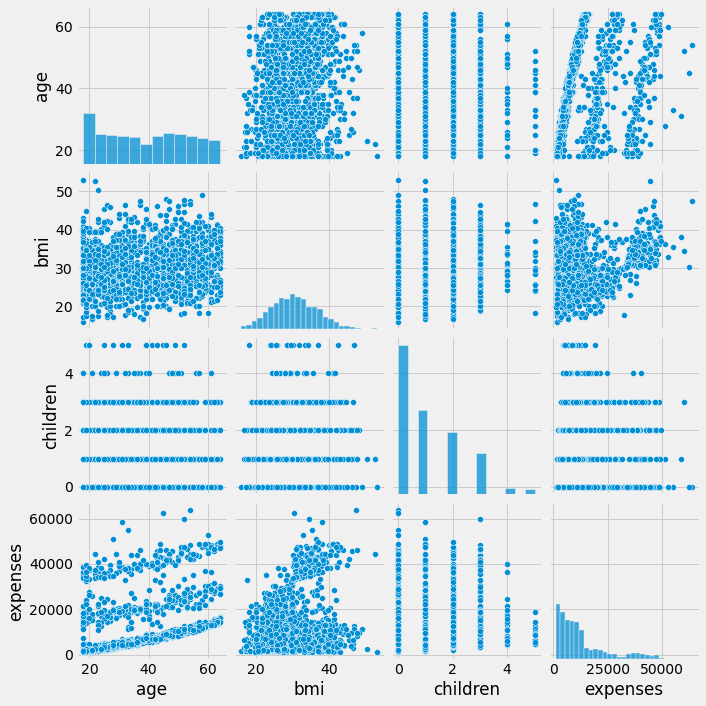

In [53]:
# Visualizing using Pair Plot

sns.pairplot(data)

In [13]:
# Checking the correlation

data.corr()

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


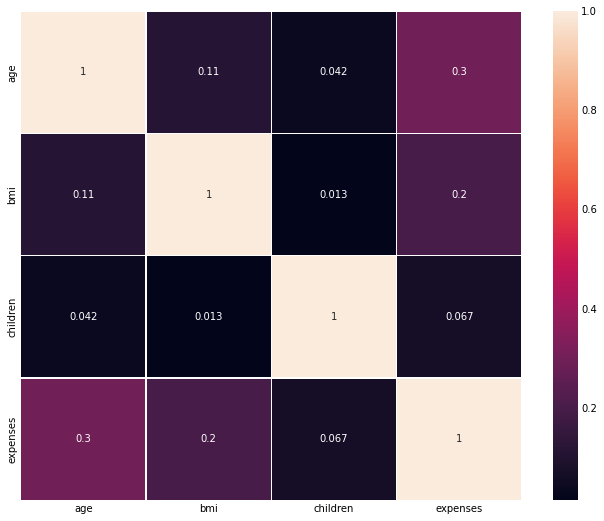

In [14]:
# Plot the Correlation Matrix with Raw Data (Linear Correlation)

plt.figure(figsize = (10,9))
sns.heatmap(data.corr(), annot = True,linewidth=0.5)
plt.show()

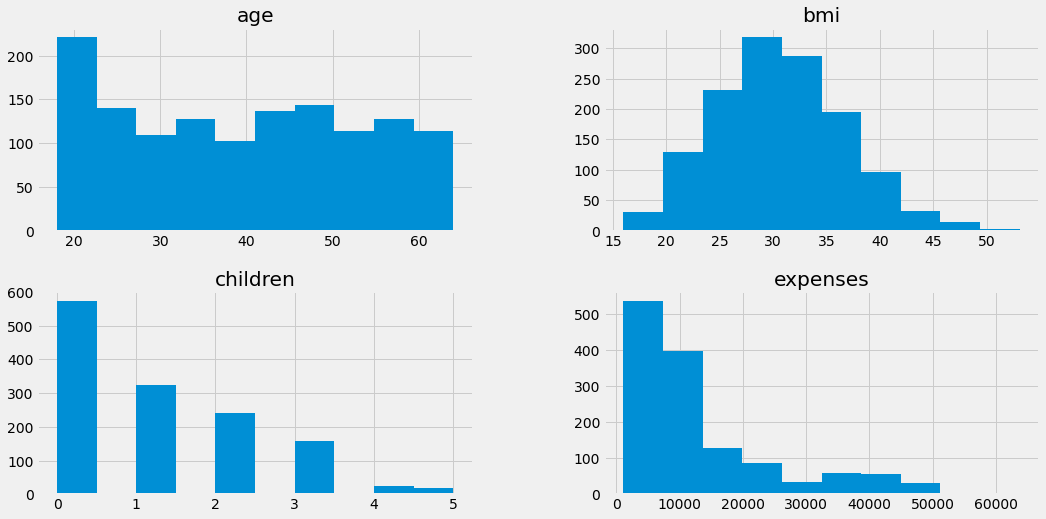

In [54]:
# Histogram per each numerical column

data.hist(figsize=(16, 8))

plt.savefig("Histogram.png")

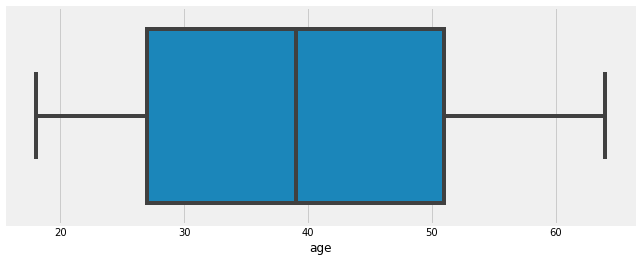

In [16]:
# Boxplot of age column 

plt.figure(figsize=(10, 4))
sns.boxplot(x=data['age'])
plt.savefig("Boxplot1.png")

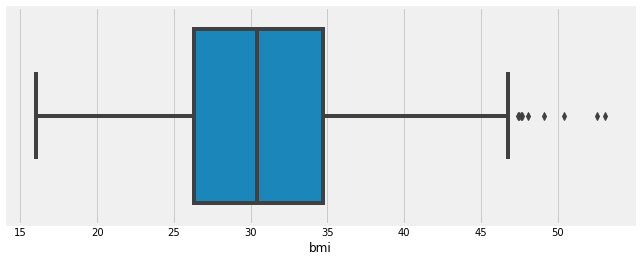

In [17]:
# Boxplot of bmi column 

plt.figure(figsize=(10, 4))
sns.boxplot(x=data['bmi'])
plt.savefig("Boxplot2.png")

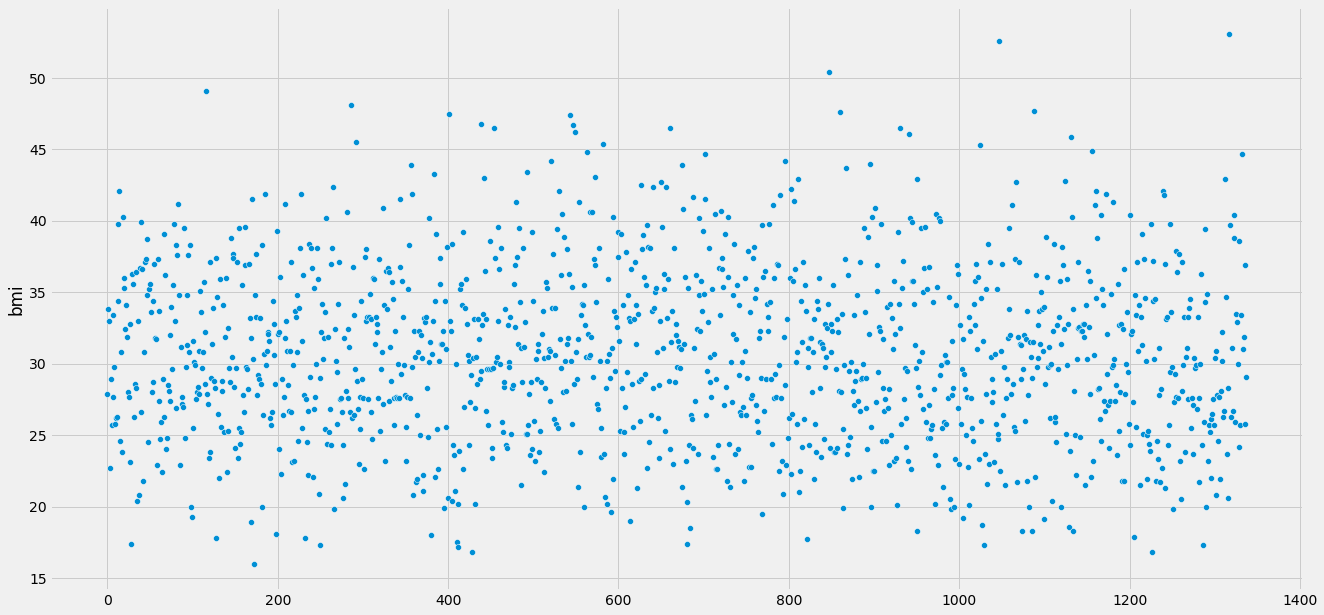

In [55]:
# Scatter plot for visualizing outliers on bmi

sns.scatterplot(data = data['bmi'])

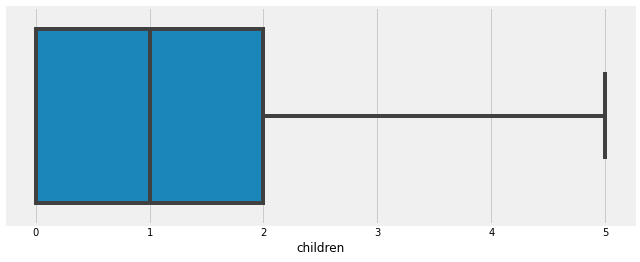

In [19]:
# Boxplot of children column 

plt.figure(figsize=(10, 4))
sns.boxplot(x=data['children'])
plt.savefig("Boxplot3.png")

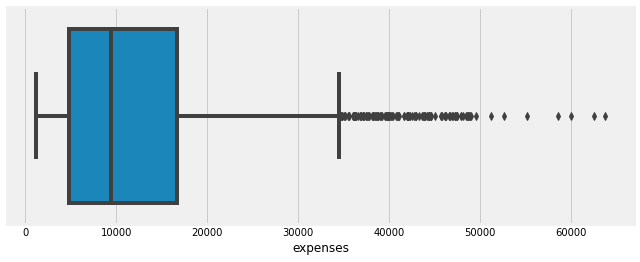

In [20]:
# Boxplot of expenses column 

plt.figure(figsize=(10, 4))
sns.boxplot(x=data['expenses'])
plt.savefig("Boxplot4.png")

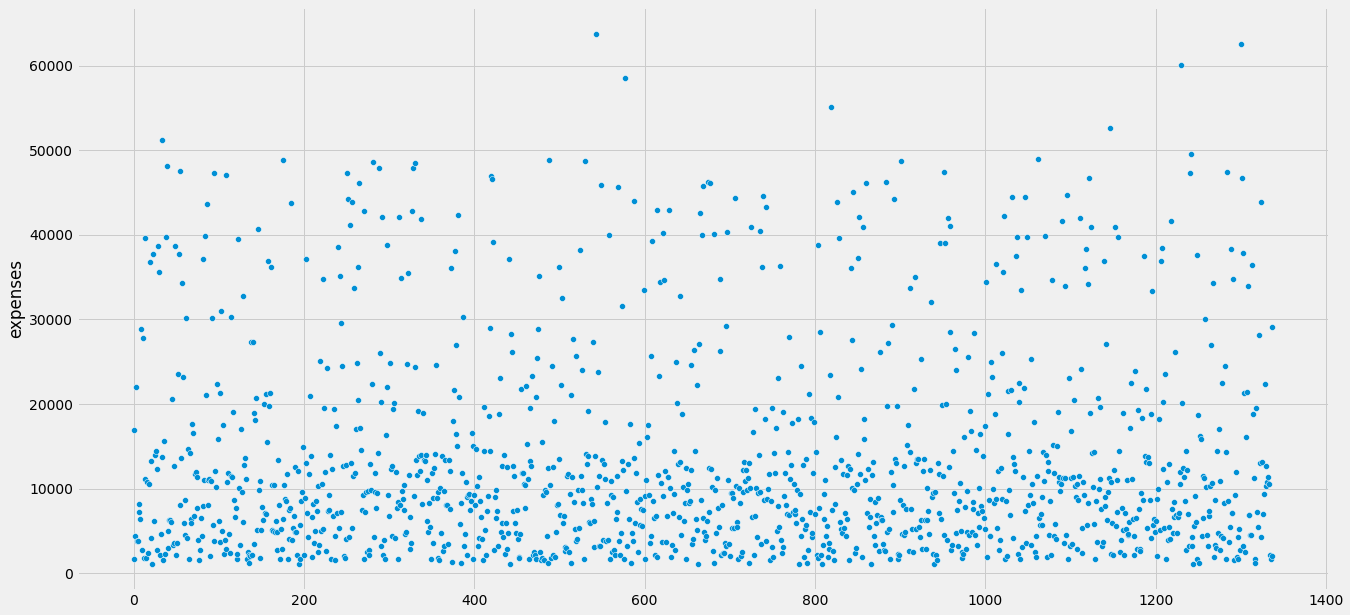

In [56]:
# Scatter plot for visualizing outliers on expenses

sns.scatterplot(data = data['expenses'])

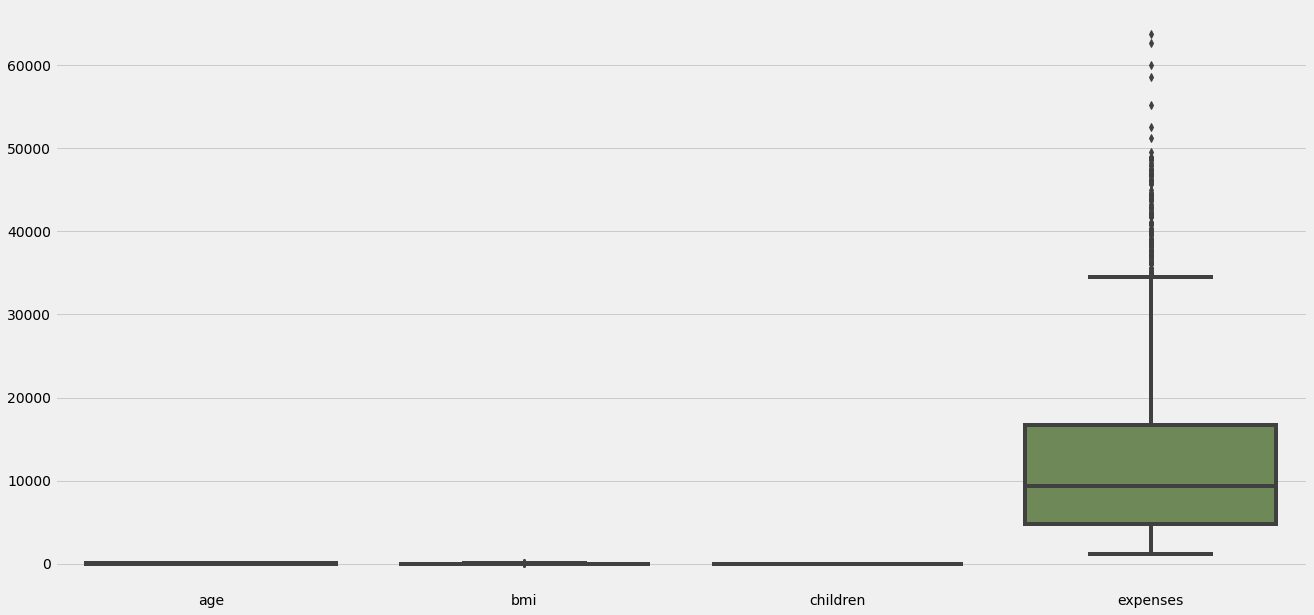

In [57]:
# Boxplot of all numerical variables

sns.boxplot(data = data)


In [23]:
# Statistical Measurement of dataset

data.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


## Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


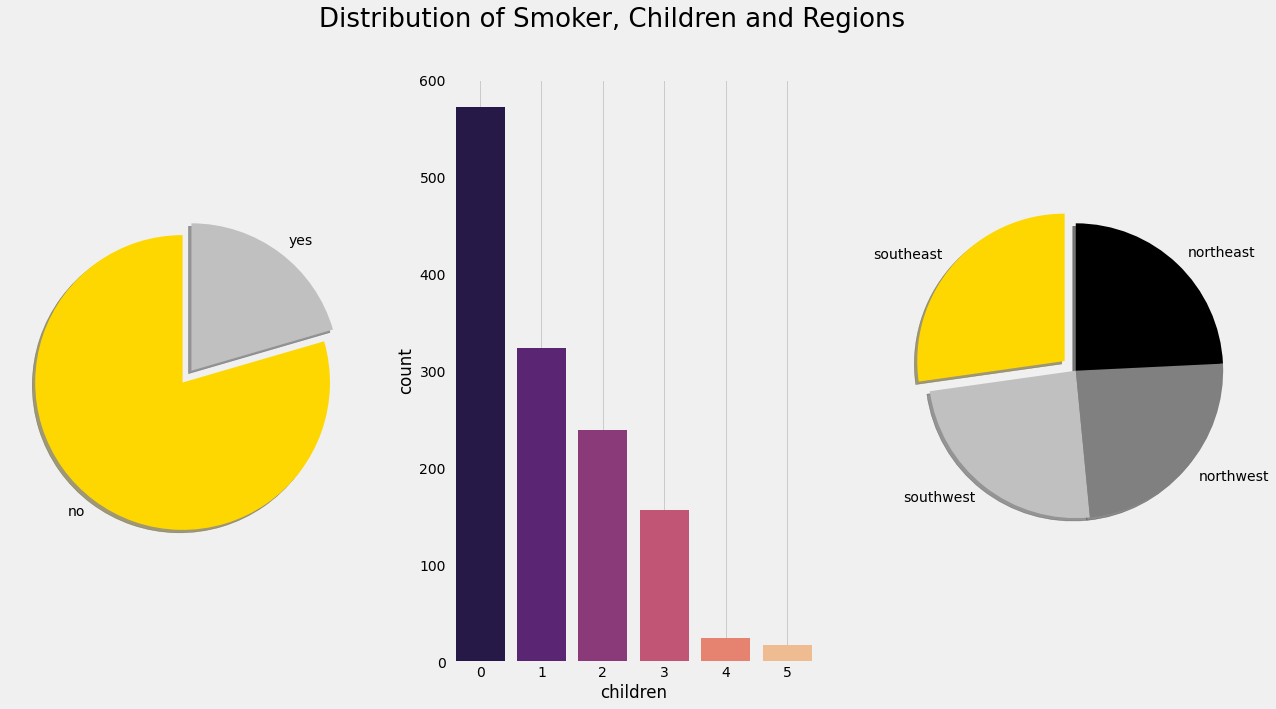

In [58]:
# Checking distribution of smoker, children, region first

# Plot 1
plt.subplot (1, 3, 1)

plt.pie ( data['smoker'].value_counts().values,
          labels = data['smoker'].value_counts().index,
          colors = ['gold','silver'],
          startangle = 90,
          shadow = True,
          explode = [0.1, 0] )


# Plot 2
plt.subplot (1, 3, 2)

sns.countplot ( data['children'], palette = 'magma' )
plt.grid()


# Plot 3
plt.subplot (1, 3, 3)

plt.pie ( data['region'].value_counts().values,
          labels = data['region'].value_counts().index,
          colors = ['gold','silver','grey','black'],
          startangle = 90,
          shadow = True,
          explode = [0.1, 0, 0, 0] )

# Plot Out
plt.suptitle('Distribution of Smoker, Children and Regions', fontsize = 26)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

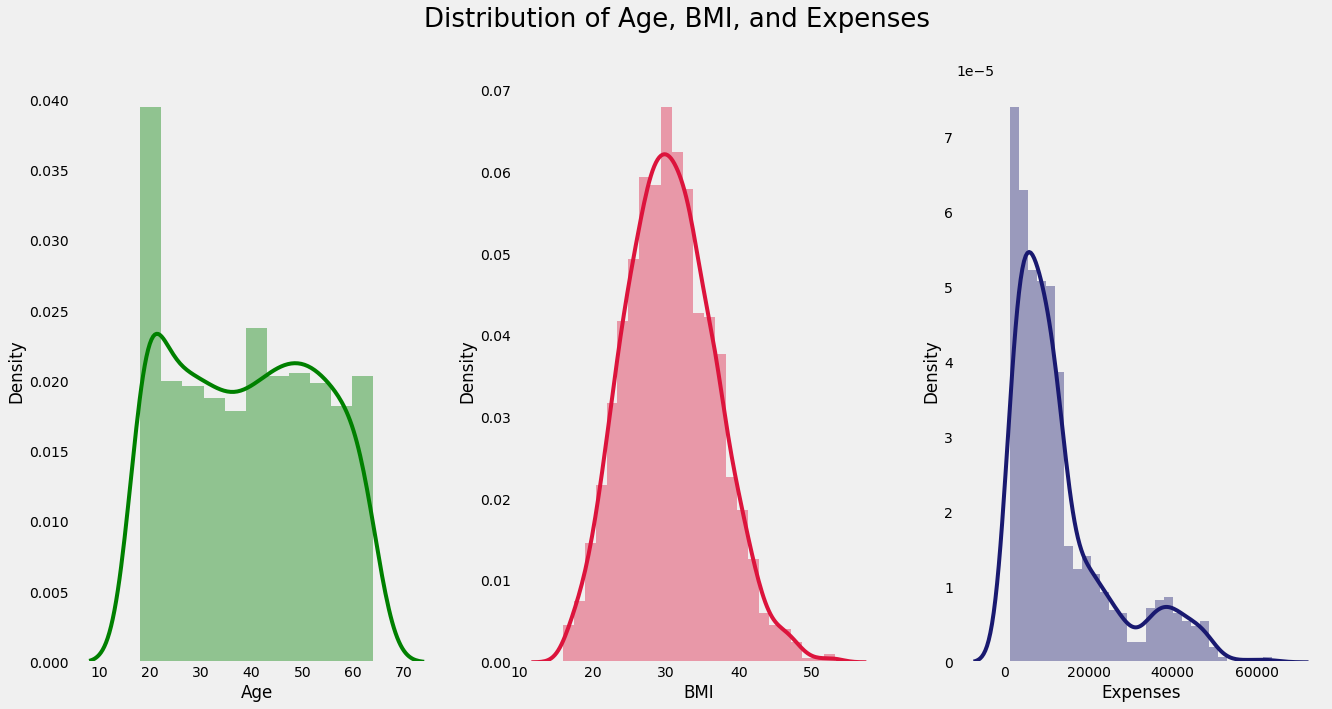

In [59]:
# Checking distribution of age, bmi and expenses next

# Plot 1
plt.subplot (1, 3, 1)

sns.distplot (data['age'], color ='green')
plt.xlabel ('Age')
plt.grid()


# Plot 2
plt.subplot (1, 3, 2)

sns.distplot (data['bmi'], color = 'crimson')
plt.xlabel ('BMI')
plt.grid()


# Plot 3
plt.subplot (1, 3, 3)

sns.distplot (data['expenses'], color = 'midnightblue')
plt.xlabel ('Expenses')
plt.grid()


# Plot Out
plt.suptitle ('Distribution of Age, BMI, and Expenses', fontsize = 26)

plt.show()

## Data Processing

In [26]:
# Checking for the categorical columns

data.select_dtypes('object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [27]:
# Lets use One Hot Encoding to encode the above categorical columns 

one_hot_encoded_data = pd.get_dummies(data, columns = ['sex', 'smoker', 'region'])
one_hot_encoded_data

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1


In [28]:
# Re-ordering the data by shifting Expenses column to end

column_to_reorder = one_hot_encoded_data.pop('expenses')

one_hot_encoded_data.insert(len(one_hot_encoded_data. columns), 'expenses', column_to_reorder)

one_hot_encoded_data

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,expenses
0,19,27.9,0,1,0,0,1,0,0,0,1,16884.92
1,18,33.8,1,0,1,1,0,0,0,1,0,1725.55
2,28,33.0,3,0,1,1,0,0,0,1,0,4449.46
3,33,22.7,0,0,1,1,0,0,1,0,0,21984.47
4,32,28.9,0,0,1,1,0,0,1,0,0,3866.86
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,0,1,1,0,0,1,0,0,10600.55
1334,18,31.9,0,1,0,1,0,1,0,0,0,2205.98
1335,18,36.9,0,1,0,1,0,0,0,1,0,1629.83
1336,21,25.8,0,1,0,1,0,0,0,0,1,2007.95


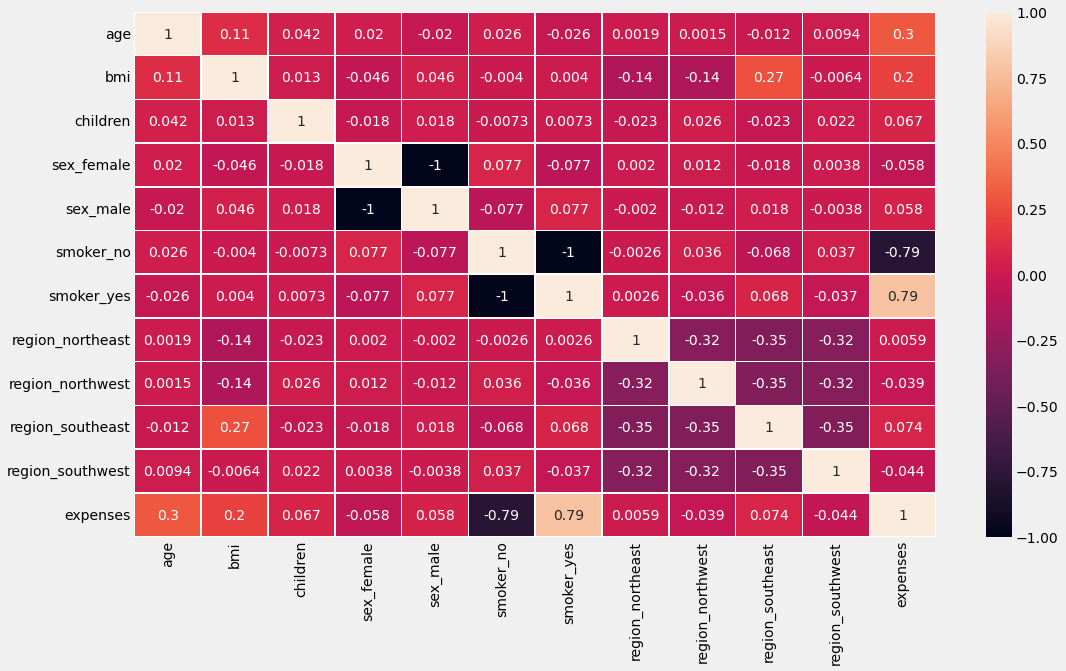

In [60]:
# Plot the Correlation Matrix on encoded data (Linear Correlation)

plt.figure(figsize = (16,9))
sns.heatmap(one_hot_encoded_data.corr(), annot = True,linewidth=0.5)
plt.show()

From the above representation we can say that,

In between Age and Sex we have very weak Correlation, age and BMI have weak coreelation, age and smoker also have weak correlation. Age and Expenses has a moderate correlation, Age and South-West region also Age and North-west region have a negative Correlation.

Sex and Expenses have a negative Correlation.

Correlation between Children and Expenses is very weak.

Correlation between Smoker and Expenses is strongly Negatively Correlated.

Correlation between South-East region and Expenses is weak.

Correlation between South-West region and Expenses is weakly negative.

Correlation between North-West region and Expenses is weakly negative.

Correlation between North-East region and Expenses is zero.

In [30]:
# Lets verify the One Hot Encoding process

print('Columns in original data frame:\n',data.columns.values)
print('\nNumber of rows and columns in the dataset:',data.shape)

print('\nColumns in data frame after One Hot Encoding:\n',one_hot_encoded_data.columns.values)
print('\nNumber of rows and columns in the dataset:',one_hot_encoded_data.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'expenses']

Number of rows and columns in the dataset: (1337, 7)

Columns in data frame after One Hot Encoding:
 ['age' 'bmi' 'children' 'sex_female' 'sex_male' 'smoker_no' 'smoker_yes'
 'region_northeast' 'region_northwest' 'region_southeast'
 'region_southwest' 'expenses']

Number of rows and columns in the dataset: (1337, 12)


In [31]:
# Lets extract the encoded data to a csv file for reference

one_hot_encoded_data.to_csv("processed-insurance.csv")

In [32]:
# Lets form dependent and independent sets

X = one_hot_encoded_data.drop(['expenses'], axis = 1)
y = one_hot_encoded_data['expenses']


print(X.columns)
print("\n")
print(y.shape)

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


(1337,)


In [33]:
# Lets perform Train - Test - Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 11)
(268, 11)
(1069,)
(268,)


In [34]:
# Lets perform Standardization using Standard Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Predictive Modelling

## Linear Regression Model

In [35]:
# Creating a simple Linear Regression Model

from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train,y_train)

y_pred1 = lin.predict (X_test)

print("Training Score     :", lin.score(X_train,y_train))
print("Testing Score      :", lin.score(X_test,y_test))

Training Score     : 0.7488769969730097
Testing Score      : 0.7530509541914574


In [36]:
# Model Accuracy -- R2 // RMSE

from sklearn.metrics import r2_score, mean_squared_error


mse = mean_squared_error (y_test, y_pred1)
rmse = np.sqrt(mse)
print("RMSE Score     :", rmse)

r2_score = r2_score (y_test, y_pred1)
print("R2 Score       :", r2_score)

RMSE Score     : 6445.473682867912
R2 Score       : 0.7530509541914574


In [37]:
# Creating a simple Linear Regression Model with Scaled data

from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train_scaled,y_train)

y_pred1_scaled = lin.predict (X_test_scaled)

print("Training Score     :", lin.score(X_train_scaled,y_train))
print("Testing Score      :", lin.score(X_test_scaled,y_test))

Training Score     : 0.7488441168659459
Testing Score      : 0.7534323358450128


In [38]:
# Model Accuracy for scaled data -- R2 // RMSE

from sklearn.metrics import r2_score, mean_squared_error


mse = mean_squared_error (y_test, y_pred1_scaled)
rmse = np.sqrt(mse)
print("RMSE Score     :", rmse)

r2_score = r2_score (y_test, y_pred1_scaled)
print("R2 Score       :", r2_score)

RMSE Score     : 6440.494649185112
R2 Score       : 0.7534323358450128


## K-Nearest Neighbors Model

In [39]:
# Creating a simple KNN Model

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

y_pred2 = knn.predict (X_test)

print("Training Score     :", knn.score(X_train, y_train))
print("Testing Score      :", knn.score(X_test, y_test))

Training Score     : 0.4954577380856632
Testing Score      : 0.3391870610379586


In [40]:
# Model Accuracy -- R2 // RMSE

from sklearn.metrics import r2_score, mean_squared_error


mse = mean_squared_error (y_test, y_pred2)
rmse = np.sqrt(mse)
print("RMSE Score     :", rmse)

r2_score = r2_score (y_test, y_pred2)
print("R2 Score       :", r2_score)

RMSE Score     : 10543.636680643014
R2 Score       : 0.3391870610379586


In [41]:
# Creating a simple KNN Model with scaled data

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled,y_train)

y_pred2_scaled = knn.predict (X_test_scaled)

print("Training Score     :", knn.score(X_train_scaled, y_train))
print("Testing Score      :", knn.score(X_test_scaled, y_test))

Training Score     : 0.8636905165020783
Testing Score      : 0.798254768782863


In [42]:
# Model Accuracy for scaled data -- R2 // RMSE

from sklearn.metrics import r2_score, mean_squared_error


mse = mean_squared_error (y_test, y_pred2_scaled)
rmse = np.sqrt(mse)
print("RMSE Score     :", rmse)

r2_score = r2_score (y_test, y_pred2_scaled)
print("R2 Score       :", r2_score)

RMSE Score     : 5825.762855660883
R2 Score       : 0.798254768782863


## Random Forest Model

In [43]:
# Creating a Random Forest Model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit (X_train, y_train)

y_pred3 = rf.predict (X_test)

print("Training Score     :", rf.score(X_train, y_train))
print("Testing Score      :", rf.score(X_test, y_test))

Training Score     : 0.9756010700633303
Testing Score      : 0.8355130964477948


In [44]:
# Model Accuracy -- R2 // RMSE

from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error (y_test, y_pred3)
rmse = np.sqrt(mse)
print("RMSE Score     :", rmse)

r2_score = r2_score (y_test, y_pred3)
print("R2 Score       :", r2_score)

RMSE Score     : 5260.376462560514
R2 Score       : 0.8355130964477948


In [45]:
# Creating a Random Forest Model with scaled data

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit (X_train_scaled, y_train)

y_pred3_scaled = rf.predict (X_test_scaled)

print("Training Score     :", rf.score(X_train_scaled, y_train))
print("Testing Score      :", rf.score(X_test_scaled, y_test))

Training Score     : 0.9760152855399347
Testing Score      : 0.8348225640265647


In [46]:
# Model Accuracy for scaled data -- R2 // RMSE

from sklearn.metrics import r2_score, mean_squared_error


mse = mean_squared_error (y_test, y_pred3_scaled)
rmse = np.sqrt(mse)
print("RMSE Score     :", rmse)

r2_score = r2_score (y_test, y_pred3_scaled)
print("R2 Score       :", r2_score)

RMSE Score     : 5271.406690622661
R2 Score       : 0.8348225640265647


## Ensemble of all three models

In [47]:
# Trying to identify a good ensemble of methods

# Ensemble by average of all three models

from sklearn.metrics import r2_score, mean_squared_error

avg_model = (y_pred1 + y_pred2 + y_pred3) / 3


mse = mean_squared_error (y_test, avg_model)
rmse = np.sqrt(mse)
print("RMSE Score     :", rmse)

r2_score = r2_score (y_test, avg_model)
print("R2 Score       :", r2_score)

RMSE Score     : 6342.6688352446
R2 Score       : 0.7608657697914418


In [48]:
# Ensemble by average for scaled models

from sklearn.metrics import r2_score, mean_squared_error

avg_model = (y_pred1_scaled + y_pred2_scaled + y_pred3_scaled) / 3


mse = mean_squared_error (y_test, avg_model)
rmse = np.sqrt(mse)
print("RMSE Score     :", rmse)

r2_score = r2_score (y_test, avg_model)
print("R2 Score       :", r2_score)

RMSE Score     : 5405.024163198314
R2 Score       : 0.8263427365265402


## Weighted Average Model

In [49]:
# Creating a weighted average model

# Giving 50% weight to random forest
# 30% weight to knn
# and 20% weight to linear regression

weight_avg_model = 0.2*y_pred1_scaled + 0.3*y_pred2_scaled + 0.5*y_pred3_scaled

# Checking the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, weight_avg_model)
rmse = np.sqrt(mse)
print("RMSE Score     :", rmse)

r2_score = r2_score(y_test, weight_avg_model)
print("R2 Score       :",r2_score)

RMSE Score     : 5255.008154660751
R2 Score       : 0.835848648773022


## Cross Validation

In [50]:
# 5-fold Cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv= 5)
print("The 5-fold Cross Validation scores using Random Forest model   :",scores)

The 5-fold Cross Validation scores using Random Forest model   : [0.84943636 0.77818035 0.87267239 0.8309596  0.85577954]


## Comparision of all three models with scaled data

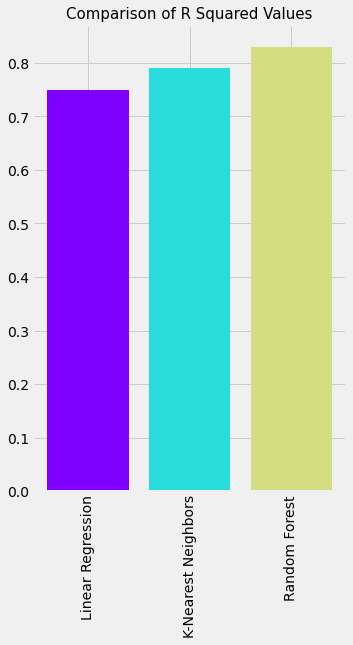

In [51]:
# Comparing R Squared Values

r2_score = np.array([0.75, 0.79, 0.83])
labels = np.array(['Linear Regression', 'K-Nearest Neighbors' , 'Random Forest'])
index = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 4))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (5, 8)

plt.bar(range(len(index)), r2_score[index], color = color)
plt.xticks(range(0, 3), ['Linear Regression', 'K-Nearest Neighbors','Random Forest'], rotation = 90)
plt.title('Comparison of R Squared Values', fontsize = 15)
plt.show()

# Possible Improvements

*   We can try some more predictive models and compare the results.
*   We can try converting the expense column to a normal distribution using log or square root transformation.
* We can try some more predictive models on this dataset to get more accuracy.

# Conclusion

We have built three models among which the Random Forest Regressor model shows the best result through which we can say 83.75% variability of expenses can well be explained by predictor variables and which yields comparatively low RMSE value so our predicted expense through this model will not vary too much from the actual expense.